# Paris' trees analysis
## Objective:

Define a better inspection route for gardeners to take care of the city's trees

With the identification of types and caracteristics, routes could be planned to minimize mouvements and optimize the work force.
## Caracteristics:

What makes two trees alike / different ? Size ? Height ? Health ? Location ?

Created a new venv, and installed libraries using the shell
$ pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('p2-arbres-fr.csv', sep = ";")

In [4]:
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [5]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


Already we can observe that continuous features "circonference_cm" and "hauteur_m" have abnormal max values, which will need cleaning because that falsifies std and mean

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

## First glance :
### Structure:

    18 columns
    200137 lines

Now to print a detail of each column

In [7]:
max_value=200137

for col in data:
    unique_counter = data[col].nunique()
    if unique_counter == max_value:
        print({col}, "\n" ,"Only unique values","\n")
    else:
        count = data[col].value_counts()
        freq = data[col].value_counts(normalize=True)

        dat = {"Count" :count , "Freq":freq}

        df = pd.DataFrame(dat)
        print({col},"\n" ,"Unique_counter: ", unique_counter, "\n" ,df,"\n")

{'id'} 
 Only unique values 

{'type_emplacement'} 
 Unique_counter:  1 
                    Count  Freq
type_emplacement              
Arbre             200137   1.0 

{'domanialite'} 
 Unique_counter:  9 
                Count      Freq
domanialite                   
Alignement    104949  0.524388
Jardin         46262  0.231153
CIMETIERE      31926  0.159522
DASCO           6422  0.032088
PERIPHERIQUE    5327  0.026617
DJS             3900  0.019487
DFPE            1325  0.006620
DAC               21  0.000105
DASES              4  0.000020 

{'arrondissement'} 
 Unique_counter:  25 
                    Count      Freq
arrondissement                    
PARIS 15E ARRDT    17151  0.085696
PARIS 13E ARRDT    16712  0.083503
PARIS 16E ARRDT    16403  0.081959
PARIS 20E ARRDT    15340  0.076647
PARIS 19E ARRDT    13709  0.068498
PARIS 12E ARRDT    12600  0.062957
SEINE-SAINT-DENIS  11570  0.057810
BOIS DE VINCENNES  11510  0.057511
PARIS 14E ARRDT    11399  0.056956
PARIS 17E ARRDT    10


## Inspection of each column:

1.   "id" => tree identifier => to be kept as is
2.   "type_emplacement" => 1 unique => no information on trees => to be *removed*
3.   "domanialite" => 90% of trees in 3 categories => to be **modified**
4.   "arrondissement" => various data => relevant to organize => to be kept as is
5. "complement_addresse" => can't be read by humans => to be *removed*
6. "numero" => 0 non-null => empty column => to be *removed*
7. "lieu" => incoherent => some have added information and others don't => to be **modified**
8. "id_emplacement" => can't be read by humans => to be *removed*
9. "libelle_francais" => not sure if important => to be kept as is
10. "genre" => scientific classification => to be kept as is
11. "espece" => scientific classification => to be kept as is
12. "variete" => scientific classification => to be kept as is
13. "circonference_cm" => abnormal data => to be **modified**
14. "hauteur_m" => abnormal data => to be **modified**
15. "stade_developpement" => hardly readable => to be **modified**
16. "remarquable" => 0 / 1 => needs to be translated into "yes" / "no" => to be **modified**
17. "geo_point_2d_a/geo_point_2d_b" => coordinates => to be kept as is

### Columns to be kept:
1. "id"
2. "arrondissement"
3. "libelle_francais"
4. "genre"
5. "espece"
6. "variete"
7. "geo_point_2d_a"
8. "geo_point_2d_b"

### Columns to be modified:
1. "domanialite"
2. "lieu"
3. "circonference_cm"
4. "hauteur_m"
5. "stade_developpement"
6. "remarquable"


### Irrelevant columns:
1. "type_emplacement"
2. "complement_addresse"
3. "numero"
4. "id_emplacement"

## Cleaning

### 1.   Create new dataframe without irrelevant columns

In [8]:
clearer_data = data.drop({"type_emplacement",
                          "complement_addresse",
                          "numero",
                          "id_emplacement"},
                         axis=1)
clearer_data.head()

,id,domanialite,arrondissement,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


### 2.   Clean and modify columns that need rearrangement

In [9]:
#replace 0 and 1 with "No" and "Yes" in "remarquable"
clearer_data["remarquable"].replace({0: "No",1:"Yes"}, inplace=True)

#replace 'A', 'J', 'M', 'JA',  and  with
#'Adulte', 'Jeune', 'Mature', 'Jeune Adulte' in "stade_developpement"
clearer_data["stade_developpement"].replace({"J": "Jeune",
                                             "JA":"Jeune Adulte",
                                             "A": "Adulte",
                                             "M": "Mature"},
                                            inplace=True)

#prepare a list of columns which NaNs can easily be filled
to_modify = []
for col in clearer_data:
  miss_norm = clearer_data[col].isna().value_counts(normalize=True)
  if True in miss_norm.index:
    miss_percent = round(miss_norm.get(True, 0)*100,5)
    if miss_percent < 10:
      to_modify.append(col)

#modifying columns
for i in to_modify:
  clearer_data[i] = clearer_data[i].fillna("Other")

## Missing values

In [10]:
# Percentage of missing values in each columns
for col in clearer_data:
  miss_norm = clearer_data[col].isna().value_counts(normalize=True)
  if True in miss_norm.index:
    miss_values = clearer_data[col].isna().value_counts()
    miss_percent = round(miss_norm.get(True, 0)*100,5)
    print(f"{col}","\n",miss_percent,"% Missing values","\n",
          "Total : ",miss_values.get(True, 0),"\n")

variete 
 81.62409 % Missing values 
 Total :  163360 

stade_developpement 
 33.5795 % Missing values 
 Total :  67205 

remarquable 
 31.5274 % Missing values 
 Total :  63098 



### Inferences possibilities

* "stade_developpement" and "remarquable" 34%, and 32% missing values.
* "variete" has 82% missing values.

We can't infer values statistically, as these are categorical features.

1.   "variete": try to infer depending on "genre" and "espece" ? same genre and same specie may imply same variete

=> after research, knowing variety could be irrelevant to trees maintenance

2.   "stade_developpement": try to infer depending on "espece", "hauteur_cm" and "circonference_cm" ? a certain height and circumference may imply a growth stage for a certain tree specie

=> in any case,

3.   "remarquable": can't be infered at all

Wee can however work on continuous categories such as hauteur_m and circonference_cm
We will start with "hauteur_m"

## Hauteur_m

We will try and clean this categorie by trying to find abnormal values and outliers, by a min/max approach and a statistical approach

### Min/Max approach

In [11]:
clearer_data["hauteur_m"].describe()

count    200137.000000
mean         13.110509
std        1971.217387
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

This Max height is seems impossible, as research indicates that the tallest tree in the world is 115m high.
We will drop out all values above 115m

In [12]:
i = clearer_data.loc[clearer_data["hauteur_m"] > 115].index
clearer_data.drop(i, inplace=True)
clearer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200048 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200048 non-null  int64  
 1   domanialite          200048 non-null  object 
 2   arrondissement       200048 non-null  object 
 3   lieu                 200048 non-null  object 
 4   libelle_francais     200048 non-null  object 
 5   genre                200048 non-null  object 
 6   espece               200048 non-null  object 
 7   variete              36771 non-null   object 
 8   circonference_cm     200048 non-null  int64  
 9   hauteur_m            200048 non-null  int64  
 10  stade_developpement  132845 non-null  object 
 11  remarquable          136951 non-null  object 
 12  geo_point_2d_a       200048 non-null  float64
 13  geo_point_2d_b       200048 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 22.9+ MB


It might be better to replace abnormal values with NaN so trees can be mesured again, but since dropped trees represent less than 0.5% of total data, so for our analytic purpose it is fine to drop them.

We then check again the now highest tree

In [13]:
#check again new highest
i = np.argmax(clearer_data["hauteur_m"])
print(clearer_data["hauteur_m"].describe(),"\n",clearer_data.iloc[i])

count    200048.000000
mean          8.462244
std           6.946700
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max         115.000000
Name: hauteur_m, dtype: float64 
 id                                      246377
domanialite                         Alignement
arrondissement                 PARIS 14E ARRDT
lieu                   BOULEVARD SAINT JACQUES
libelle_francais                       Platane
genre                                 Platanus
espece                             x hispanica
variete                                    NaN
circonference_cm                           105
hauteur_m                                  115
stade_developpement                      Jeune
remarquable                                 No
geo_point_2d_a                       48.833171
geo_point_2d_b                        2.337196
Name: 123265, dtype: object


Research indicates that "mature" platanus can grow up to 50m. This one is indicated as a "young", so the data must be erroneous.

This demonstrates that the min/max approach isn't enough, we will therefore move on to a statistical approach

### Statistical approach
To start this approach we will check:

*   Q1 and Q3
*   IQR
*   Mean and median
*   Mode



In [14]:
Q1, Q2, Q3 = np.percentile(clearer_data["hauteur_m"], [25,50,75])
mean_haut = np.mean(clearer_data["hauteur_m"])
IQR = Q3-Q1
mode = sts.mode(clearer_data["hauteur_m"])
print("Q1:",Q1,'\n', "Q3:",Q3,'\n', "IQR:",IQR)
print("median:",Q2,'\n',"mean:",mean_haut)
print("mode:", mode)

Q1: 5.0 
 Q3: 12.0 
 IQR: 7.0
median: 8.0 
 mean: 8.462244061425258
mode: ModeResult(mode=0, count=39219)


This underlines a few issues:
* The mode is 0m with 39219 occurences, which would mean that 20% of Paris's trees are not grown at all, which seems impossible
* The median being less sensitive than the mean, we could trust its value, but the mean itself must be flawed.

We can plot a graphic to visually represent the data

c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Trees height'), Text(0.5, 0, 'Height (m)')]

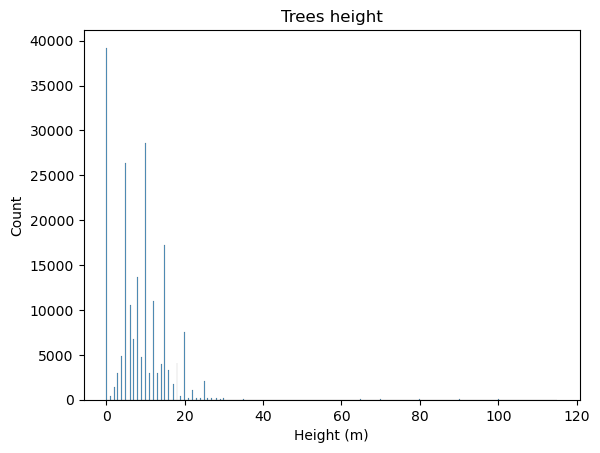

In [15]:
sns.histplot(clearer_data, x="hauteur_m").set(title="Trees height", xlabel="Height (m)")

We can see that the 0s are indeed far too many, but also that beyond 30m, data seems to thin considerably, which could mean a lot of errors.

For now let's replace the 0s with NaN. It will be up to the city of Paris to re-measure the trees

In [16]:
#Create a copy of data because we will be performing some work on it
cldat_copy = clearer_data.copy()

#replace 0 with nan and check data again
cldat_copy["hauteur_m"].where(cldat_copy["hauteur_m"] > 0, inplace=True)
print(cldat_copy["hauteur_m"].describe())

count    160829.000000
mean         10.525807
std           6.188987
min           1.000000
25%           6.000000
50%          10.000000
75%          14.000000
max         115.000000
Name: hauteur_m, dtype: float64


It now seems clearer, so we will define and remove outliers before looking at a graphic of the distribution again
We will us the IQR method to define lower and upper bounds

In [17]:
#define lower and upper bounds
lower_bound = Q1-(IQR*1.5)
upper_bound = Q3+(IQR*1.5)

#define the limits of an average tree into a dataframe for latter usage if needed
limits = pd.DataFrame({
        'hauteur_m': [
        max(cldat_copy["hauteur_m"].min(), lower_bound), # min
        upper_bound, # max
    ]
}, index=['min', 'max'])

display(limits)

,hauteur_m
min,1.0
max,22.5


An "average" tree will be between 1m and 26m in height

Knowing that, we will drop outliers to represent the tree canopy of Paris

c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

[Text(0.5, 1.0, 'Tree height by maturing degree'),
 Text(0.5, 0, 'Height (m)'),
 Text(0, 0.5, 'Count')]

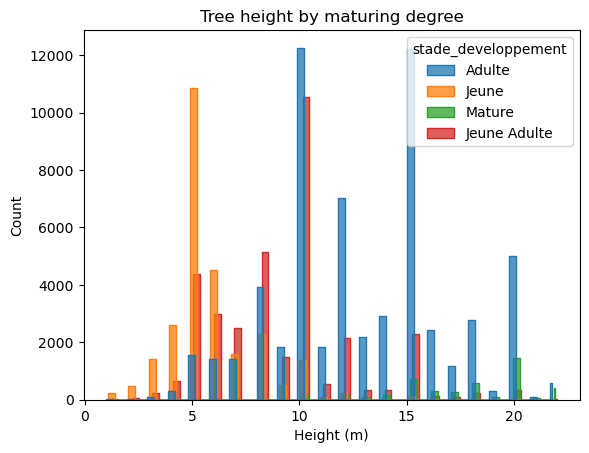

In [18]:
#define outliers
outliers = cldat_copy[
    (cldat_copy['hauteur_m'] <= limits.loc['min','hauteur_m'])
    |(cldat_copy['hauteur_m'] >= limits.loc['max','hauteur_m'])
   ]

#drop outliers from "main" dataframe
outlier_mask=((cldat_copy['hauteur_m'] < limits.loc['min','hauteur_m'])
    |(cldat_copy['hauteur_m'] > limits.loc['max','hauteur_m']))
cldat_copy.drop(cldat_copy[outlier_mask].index, inplace=True)

#graph histplot with a developpment_stage hue, as tallest tree should be the oldest
sns.histplot(cldat_copy, 
             x="hauteur_m", 
             hue="stade_developpement", 
             element="step", 
             multiple="dodge").set(title='Tree height by maturing degree',
                                   xlabel="Height (m)", 
                                   ylabel="Count")

Globally tallest trees are the oldest, so everything seems to be in order. There might be errors, but we don't have means of finding them with present methods

## same as hauteur on circonference

In [19]:
clearer_data["circonference_cm"].describe()

count    200048.000000
mean         83.332505
std         673.131966
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

Research indicates that the widest tree is a baobab tree of 38m width.
Therefore a width of 250m seems impossible


In [20]:
i = clearer_data.loc[clearer_data["circonference_cm"] > 3800].index
clearer_data.drop(i, inplace=True)
clearer_data["circonference_cm"].describe()
# maybe use NaN instead of drop, so trees can be mesured again

#check new widest
i = np.argmax(clearer_data["circonference_cm"])
display(clearer_data.iloc[i])

id                                   292180
domanialite                      Alignement
arrondissement              PARIS 18E ARRDT
lieu                       RUE JEAN COCTEAU
libelle_francais       Noisetier de Byzance
genre                               Corylus
espece                              colurna
variete                                 NaN
circonference_cm                       3630
hauteur_m                                 5
stade_developpement                   Jeune
remarquable                              No
geo_point_2d_a                    48.899603
geo_point_2d_b                     2.348926
Name: 167606, dtype: object


36m in width for a height of 5m seems impossible, so the data must be erroneous. This demonstrates that the min/max approach isn't enough

Now to have a statistical approach of the categorie, we will check:

* Q1 and Q3
* IQR
* Mean and median
* Mode



In [21]:
Q1, Q2, Q3 = np.percentile(clearer_data["circonference_cm"], [25,50,75])
height_mean = np.mean(clearer_data["circonference_cm"])
IQR = Q3-Q1
mode = sts.mode(clearer_data["circonference_cm"])
print("Q1:",Q1,'\n', "Q3:",Q3,'\n', "IQR:",IQR)
print("median:",Q2,'\n',"mean:",height_mean)
print("mode:", mode)

Q1: 30.0 
 Q3: 115.0 
 IQR: 85.0
median: 70.0 
 mean: 80.02773084037395
mode: ModeResult(mode=0, count=25867)


This underlines a few issues:
* The mode is 0cm with 25867 occurences, which would mean that 13% of Paris's trees are not grown at all, which seems impossible
* The median being less sensitive than the mean, we could trust its value, but the mean itself must be flawed.

c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Tree width'), Text(0.5, 0, 'Width (cm)')]

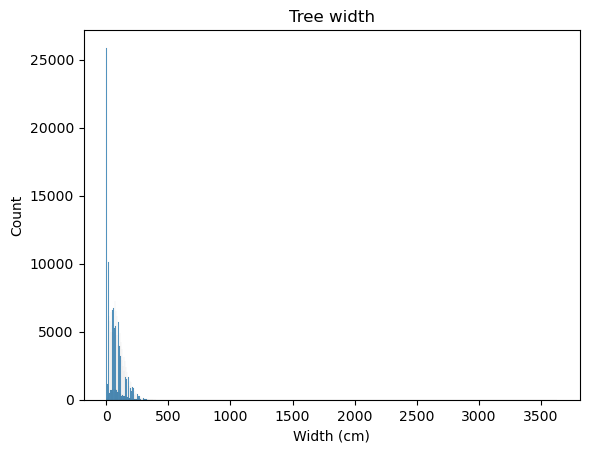

In [22]:
sns.histplot(clearer_data, x="circonference_cm").set(title="Tree width", xlabel="Width (cm)")

We can see that the 0s are again too numerous, and that despite our first removal of extreme value, there seems to be a lot of outliers still, maybe errors

We will also replace 0s with nan for this categorie

In [23]:
#We will continue work on the copy made for height treatment
cldat_copy["circonference_cm"].where(cldat_copy["circonference_cm"] > 0, 
                                     inplace=True)
print(cldat_copy["circonference_cm"].describe())

#Took the presence of nan into consideration to ignore them
Q1, Q2, Q3 = np.nanpercentile(cldat_copy["circonference_cm"], [25,50,75])
width_mean = np.mean(cldat_copy["circonference_cm"])
IQR = Q3-Q1
mode = sts.mode(cldat_copy["circonference_cm"], nan_policy="omit")
print("Q1:",Q1,'\n', "Q3:",Q3,'\n', "IQR:",IQR)
print("median:",Q2,'\n',"mean:",width_mean)
print("mode:", mode)

#define lower and upper bounds
lower_bound = Q1-(IQR*1.5)
upper_bound = Q3+(IQR*1.5)

#define the limits of an average tree
width_limits = pd.DataFrame({
        'circonference_cm': [
        max(cldat_copy["circonference_cm"].min(), lower_bound), # min
        upper_bound, # max
    ]
}, index=['min', 'max'])

display(width_limits)

count    170375.000000
mean         93.139310
std         728.107854
min           1.000000
25%          45.000000
50%          80.000000
75%         120.000000
max      250255.000000
Name: circonference_cm, dtype: float64
Q1: 45.0 
 Q3: 120.0 
 IQR: 75.0
median: 80.0 
 mean: 93.13931034482759
mode: ModeResult(mode=20.0, count=9697)


,circonference_cm
min,1.0
max,232.5


An "average tree" should be between 1cm and 232.5cm in width

c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

[Text(0.5, 1.0, 'Tree width by maturing degree'),
 Text(0.5, 0, 'width (cm)'),
 Text(0, 0.5, 'Count')]

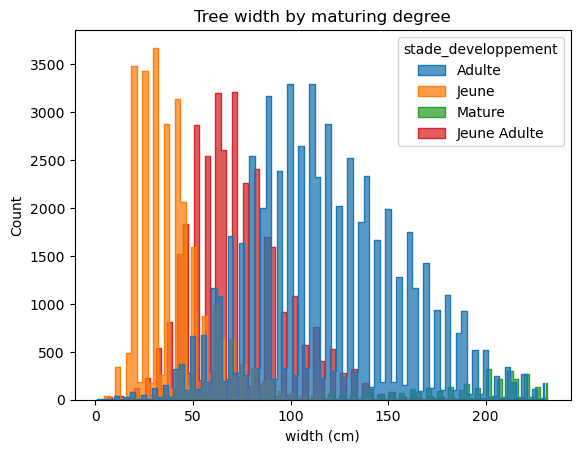

In [24]:
#define outliers
width_outlier = cldat_copy[
    (cldat_copy['circonference_cm'] <= width_limits.loc['min','circonference_cm'])
    |(cldat_copy['circonference_cm'] >= width_limits.loc['max','circonference_cm'])
   ]
width_outlier

#drop outliers from "main" dataframe
width_outlier_mask=((cldat_copy['circonference_cm'] < width_limits.loc['min','circonference_cm'])
    |(cldat_copy['circonference_cm'] > width_limits.loc['max','circonference_cm']))
cldat_copy.drop(cldat_copy[width_outlier_mask].index, inplace=True)

sns.histplot(cldat_copy,
             x="circonference_cm",
             hue="stade_developpement",
             element="step",
             multiple="dodge").set(title='Tree width by maturing degree',
                                   xlabel="width (cm)",
                                   ylabel="Count")

## Now by species

count    160811.000000
mean         10.525157
std           6.187994
min           1.000000
25%           6.000000
50%          10.000000
75%          14.000000
max         115.000000
Name: hauteur_m, dtype: float64


,hauteur_m
min,1.0
max,50.0


c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Apoxys\anaconda3\envs\ocr_p2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

[Text(0.5, 1.0, 'Tree height by maturing degree'),
 Text(0.5, 0, 'Height (m)'),
 Text(0, 0.5, 'Count')]

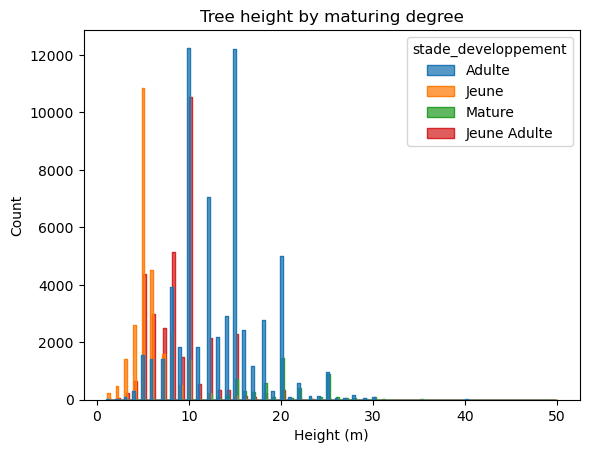

In [25]:
# Group the data by genre, as it is the most complete (cf data.describe)
grouped_data = clearer_data.groupby('genre')

grouped_data['hauteur_m'].describe()

cldat_copy_genre = clearer_data.copy()

cldat_copy_genre["hauteur_m"].where(cldat_copy_genre["hauteur_m"] > 0, inplace=True)
print(cldat_copy_genre["hauteur_m"].describe())

grouped_data2 = cldat_copy_genre.groupby('genre')

#grouped_data = cldat_copy_genre.groupby('genre')
x = grouped_data["hauteur_m"].describe()

topQ1,topQ3 = x['25%'].min(),x['75%'].max()
final_IQR = topQ3 - topQ1
topQ1,topQ3,final_IQR

#define lower and upper bounds
top_lower_bound = topQ1-(final_IQR*1.5)
top_upper_bound = topQ3+(final_IQR*1.5)

#define the limits of an average tree
genre_height_limits = pd.DataFrame({
        'hauteur_m': [
        max(cldat_copy_genre["hauteur_m"].min(), top_lower_bound), # min
        top_upper_bound, # max
    ]
}, index=['min', 'max'])

display(genre_height_limits)

#drop outliers from "main" dataframe
genre_height_outliers_mask=((cldat_copy_genre['hauteur_m'] < genre_height_limits.loc['min','hauteur_m'])
    |(cldat_copy_genre['hauteur_m'] > genre_height_limits.loc['max','hauteur_m']))
cldat_copy_genre.drop(cldat_copy_genre[genre_height_outliers_mask].index, inplace=True)

sns.histplot(cldat_copy_genre,
             x="hauteur_m",
             hue="stade_developpement",
             element="step",
             multiple="dodge").set(title='Tree height by maturing degree',
                                   xlabel="Height (m)",
                                   ylabel="Count")

There seems to be an error, as data still display tree beyond the maximum tree height observed in Paris, which is below 40m

## Now by bourough

The objective here is to determine what tree genre is most present in each bourough

In [26]:
grouped_data_bourough = clearer_data.groupby('arrondissement')

x = grouped_data_bourough['genre'].describe()

x['total_%_of_city'] = pd.to_numeric(x['count']/x['count'].sum()*100)
x['top_tree_%_in_bourough'] = pd.to_numeric(x['freq']/x['count']*100)
x['total_%_of_city'] = np.round(x['total_%_of_city'],2)
x['top_tree_%_in_bourough'] = np.round(x['top_tree_%_in_bourough'],2)
display(x)

,count,unique,top,freq,total_%_of_city,top_tree_%_in_bourough
arrondissement,,,,,,
BOIS DE BOULOGNE,3978,24,Aesculus,1318,1.99,33.13
BOIS DE VINCENNES,11502,122,Tilia,2022,5.75,17.58
HAUTS-DE-SEINE,5298,30,Acer,1372,2.65,25.90
PARIS 10E ARRDT,3384,59,Platanus,1110,1.69,32.80
PARIS 11E ARRDT,5657,72,Platanus,1682,2.83,29.73
PARIS 12E ARRDT,12589,84,Platanus,3783,6.29,30.05
PARIS 13E ARRDT,16706,98,Platanus,2468,8.35,14.77
PARIS 14E ARRDT,11396,101,Platanus,2612,5.70,22.92
PARIS 15E ARRDT,17148,96,Tilia,2202,8.57,12.84


We can now clearly see what genre of tree are most present and in what bourough, allowing teams to better prepare for each bourough